使用数学运算进行图像增强

    ·算数运算
        图像的算数运算包括加法、减法、乘法和除法。
        这些运算可以用于调整图像的亮度和对比度。

    ·阈值和掩码操作
        阈值操作可以将图像转换为二进制图像，根据像素值是否超过阈值来确定像素的取值。
        掩码操作可以根据掩码图像的像素值对原始图像进行处理。

    ·位运算
        位运算包括按位与、按位或、按位异或和按位取反。
        这些运算可以用于对图像进行位级操作，例如提取图像的某个通道或对图像进行加密。

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline

arr1 = np.array([200, 250], dtype=np.uint8).reshape(-1, 1)
print(arr1)
arr2 = np.array([40, 40], dtype=np.uint8).reshape(-1, 1)
print(arr2)
add_numpy = arr1+arr2
add_cv2 = cv2.add(arr1, arr2)
print(add_numpy)
print(add_cv2)
# 注意OpenCV的加法是饱和运算，超过255则取255，而numpy是模运算，超过256则从0开始计算

[[200]
 [250]]
[[40]
 [40]]
[[240]
 [ 34]]
[[240]
 [255]]


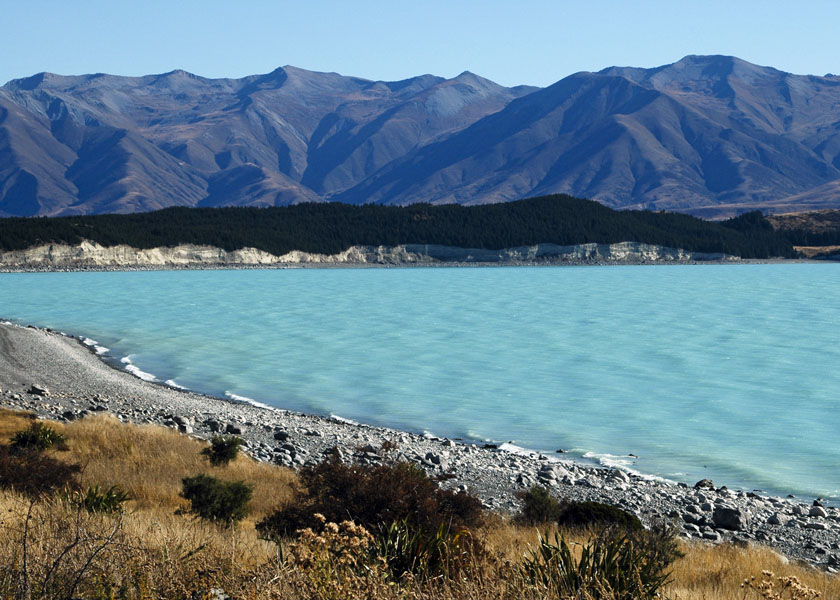

In [3]:
NZland_img = cv2.imread('New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)
NZland_rgb = NZland_img[:, :, ::-1]

Image(filename='New_Zealand_Lake.jpg')
# plt.imshow(NZland_rgb)
# plt.show()

Text(0.5, 1.0, 'Darkened Image')

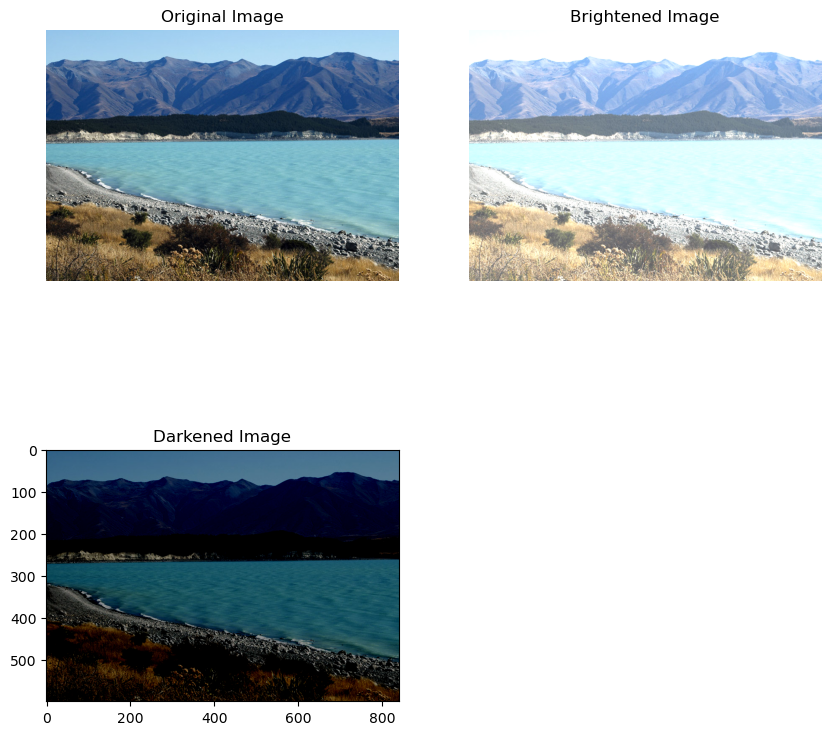

In [8]:
# 加法->改变像素强度值->改变亮度大小
shift_arr = np.ones(NZland_rgb.shape, dtype='uint8') * 100 # 100表示改变100个像素强度值,默认初始化为1，uint8，0~255

brighten_img = cv2.add(NZland_rgb, shift_arr)
darken_img = cv2.subtract(NZland_rgb, shift_arr)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(NZland_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(brighten_img)
plt.title('Brightened Image')
plt.axis('off')# 关闭坐标轴

plt.subplot(2, 2, 3)
plt.imshow(darken_img)
plt.title('Darkened Image')



(np.float64(-0.5), np.float64(839.5), np.float64(599.5), np.float64(-0.5))

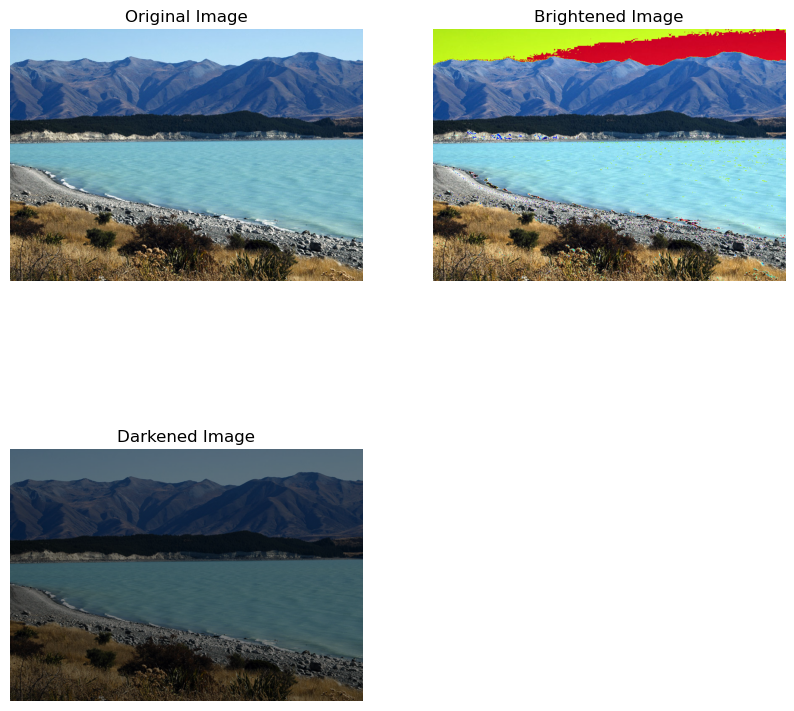

In [14]:
# 乘法cv2.multiply()->改变像素强度值->改变对比度大小。本质是像素强度值的差异×常数（大于1增加对比度，小于1减少对比度）
matirx_up = np.ones(NZland_rgb.shape, dtype='float32') * 1.2 # 1.5表示增加50%对比度,默认初始化为1，float32，0~1
matrix_down = np.ones(NZland_rgb.shape, dtype='float32') * 0.5 # 0.5表示减少50%对比度

brighten_img = np.uint8(cv2.multiply(np.float32(NZland_rgb), matirx_up))
darken_img = np.uint8(cv2.multiply(np.float32(NZland_rgb), matrix_down))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(NZland_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(brighten_img)
plt.title('Brightened Image')
plt.axis('off')# 关闭坐标轴

plt.subplot(2, 2, 3)
plt.imshow(darken_img)
plt.title('Darkened Image')
plt.axis('off')# 关闭坐标轴


#上面相乘后某些像素值超过255，颜色很奇怪

# 下面使用np.clip()处理溢出

np.clip()

    src: 输入数组

    clip_value_min: 最小值
    
    clip_value_max: 最大值

(np.float64(-0.5), np.float64(839.5), np.float64(599.5), np.float64(-0.5))

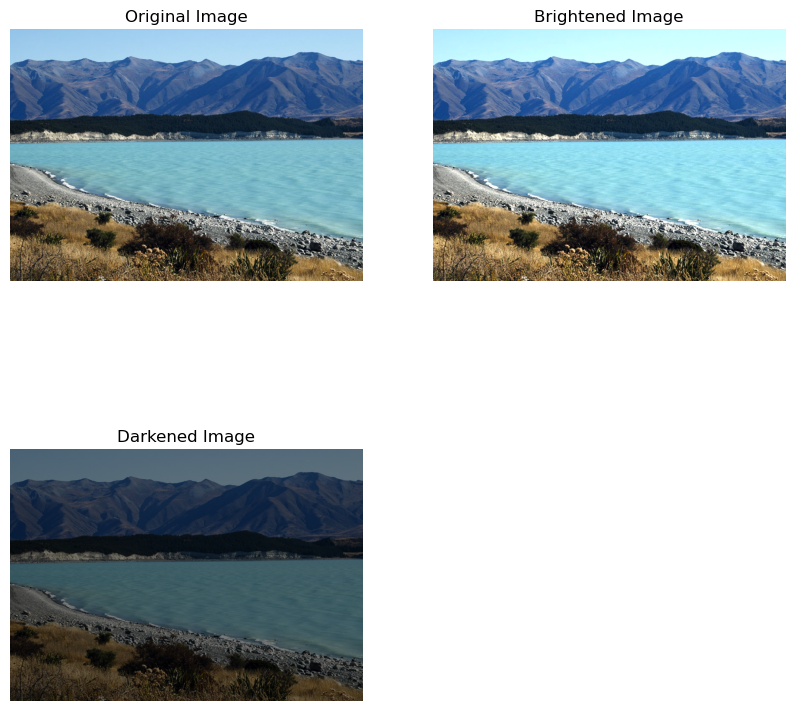

In [ ]:
matirx_up = np.ones(NZland_rgb.shape, dtype='float32') * 1.2 # 1.5表示增加50%对比度,默认初始化为1，float32，0~1
matrix_down = np.ones(NZland_rgb.shape, dtype='float32') * 0.5 # 0.5表示减少50%对比度

#需要在乘法后数值类型转换前，使用np.clip()
brighten_img = np.uint8(np.clip(cv2.multiply(np.float32(NZland_rgb), matirx_up), 0, 255))
darken_img = np.uint8(cv2.multiply(np.float32(NZland_rgb), matrix_down))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(NZland_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(brighten_img)
plt.title('Brightened Image')
plt.axis('off')# 关闭坐标轴

plt.subplot(2, 2, 3)
plt.imshow(darken_img)
plt.title('Darkened Image')
plt.axis('off')# 关闭坐标轴


# 图像阈值 Image_Thresholding

cv2.threshold()

        src: 输入数组
        
        thresh: 阈值
        maxval: 最大值
        type: 阈值类型

retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

cv.adaptiveThreshold()

        src: 输入数组
        
        maxValue: 最大值
        adaptiveMethod: 自适应方法
        thresholdType: 阈值类型
        blockSize: 块大小
        C: 常量

125.0
(1800, 1800)


(np.float64(-0.5), np.float64(1799.5), np.float64(1799.5), np.float64(-0.5))

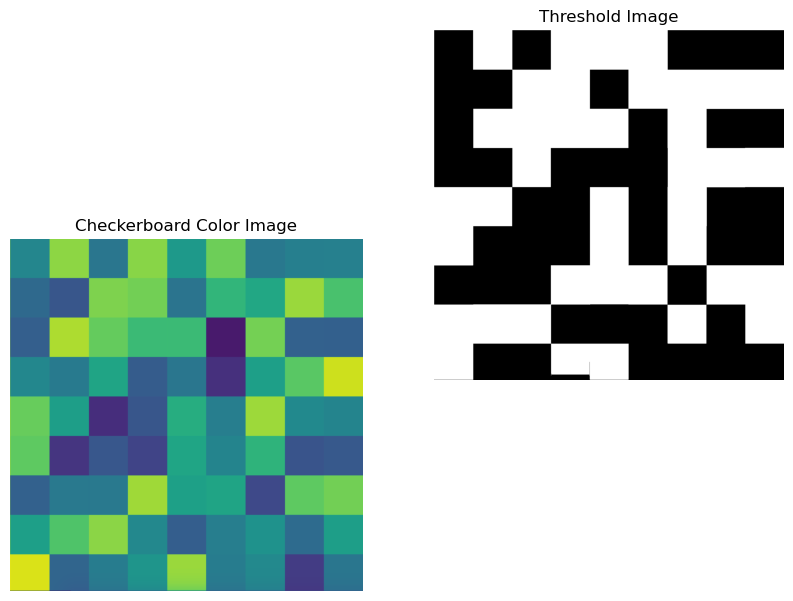

In [25]:
colors_img = cv2.imread('checkerboard_color.png',0)
colors_rgb = colors_img

retval,thresh_img = cv2.threshold(colors_rgb, 125, 255, cv2.THRESH_BINARY)
print(retval)
print(thresh_img.shape)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(colors_img)
plt.title('Checkerboard Color Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title('Threshold Image')
plt.axis('off')


(np.float64(-0.5), np.float64(1799.5), np.float64(1799.5), np.float64(-0.5))

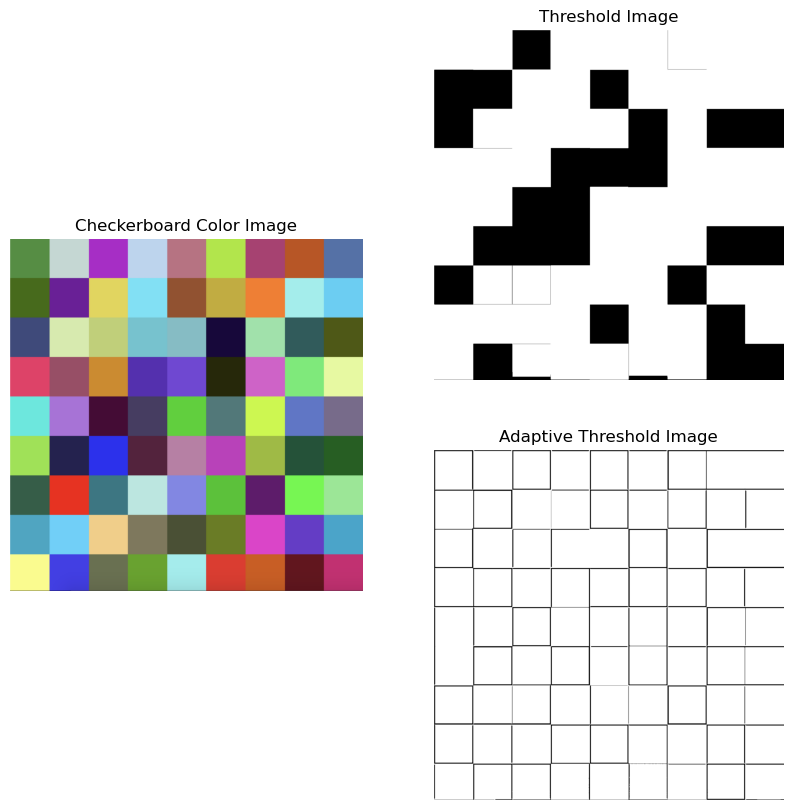

In [31]:
colors_img = cv2.imread('checkerboard_color.png',1)
colors_gray = cv2.cvtColor(colors_img, cv2.COLOR_BGR2GRAY)

retval , thresh_img = cv2.threshold(colors_gray, 100, 255, cv2.THRESH_BINARY)
thresh_img_adaptive = cv2.adaptiveThreshold(colors_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(colors_img[...,::-1])
plt.title('Checkerboard Color Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title('Threshold Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(thresh_img_adaptive, cmap='gray')
plt.title('Adaptive Threshold Image')
plt.axis('off')

# 位运算
## 按位与操作 cv2.bitwise_and()

    两个参数：

    src1，src2.
    mask：可选参数，用于指定操作的区域。

## 按位或操作 cv2.bitwise_or()

## 按位非操作 cv2.bitwise_not()

## 按位异或操作 cv2.bitwise_xor()

# Application:徽标处理

(np.float64(-0.5), np.float64(699.5), np.float64(699.5), np.float64(-0.5))

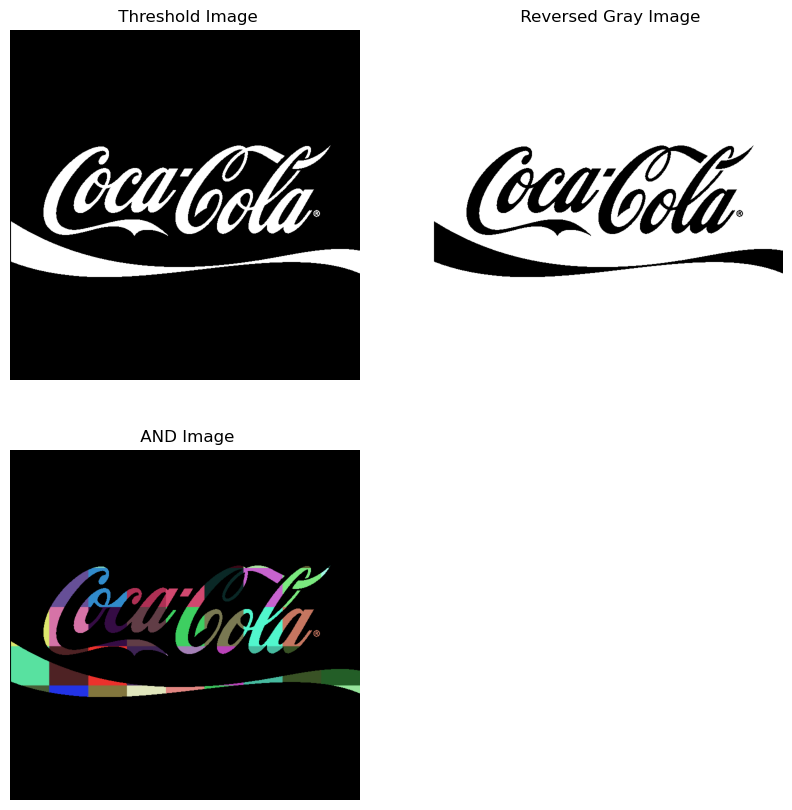

In [43]:
caco_bgr = cv2.imread('coca-cola-logo.png')
resized_colors = cv2.resize(colors_img, (caco_bgr.shape[1], caco_bgr.shape[0]))

cola_gray = cv2.cvtColor(caco_bgr, cv2.COLOR_BGR2GRAY)
_, cola_thresh = cv2.threshold(cola_gray, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cola_thresh, cmap='gray')
plt.title(' Threshold Image')
plt.axis('off')

reversed_cola_gray = cv2.bitwise_not(cola_thresh)
plt.subplot(2, 2, 2)
plt.imshow(reversed_cola_gray, cmap='gray')
plt.title(' Reversed Gray Image')
plt.axis('off')

and_img = cv2.bitwise_and(resized_colors, resized_colors, mask=cola_thresh)

plt.subplot(2, 2, 3)
plt.imshow(and_img)
plt.title(' AND Image')
plt.axis('off')



(np.float64(-0.5), np.float64(699.5), np.float64(699.5), np.float64(-0.5))

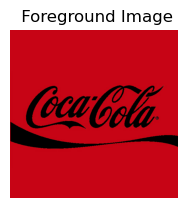

In [44]:
cola_rgb = caco_bgr[:, :, ::-1]
img_foreground = cv2.bitwise_and(cola_rgb, cola_rgb, mask=reversed_cola_gray)
plt.subplot(2, 2, 4)
plt.imshow(img_foreground)
plt.title(' Foreground Image')
plt.axis('off')


(np.float64(-0.5), np.float64(699.5), np.float64(699.5), np.float64(-0.5))

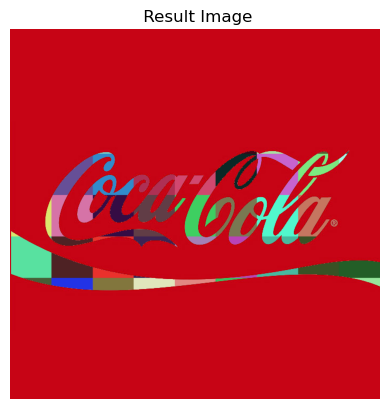

In [45]:
result = cv2.add(and_img, img_foreground)
plt.imshow(result)
plt.title(' Result Image')
plt.axis('off')